<a href="https://colab.research.google.com/github/Rishith-15/Bank-Customer-Churn-Model/blob/main/Credit_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\creditcard.csv\creditcard.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\LENOVO\\Downloads\\creditcard.csv\\creditcard.csv'


DATA PREPROCESSING


In [ ]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', data.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', data['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (data.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (data.Class == 1).sum())

Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


<Axes: xlabel='Class', ylabel='count'>

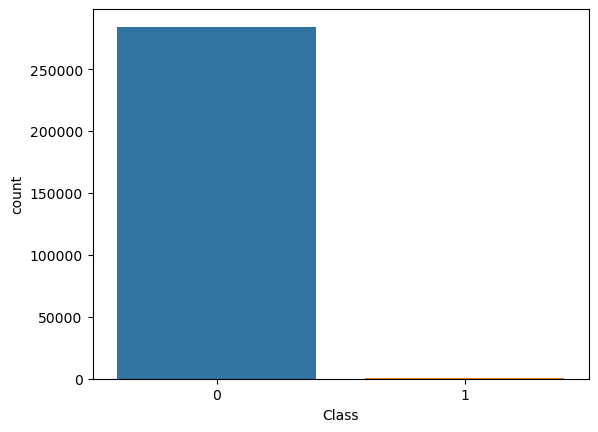

In [ ]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
sns.countplot(x='Class', data=data)

⚠️ Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions. In the next sections, we will explore effective strategies for handling this imbalance.

In [ ]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns
x = data.corr()['Class'][:30]

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

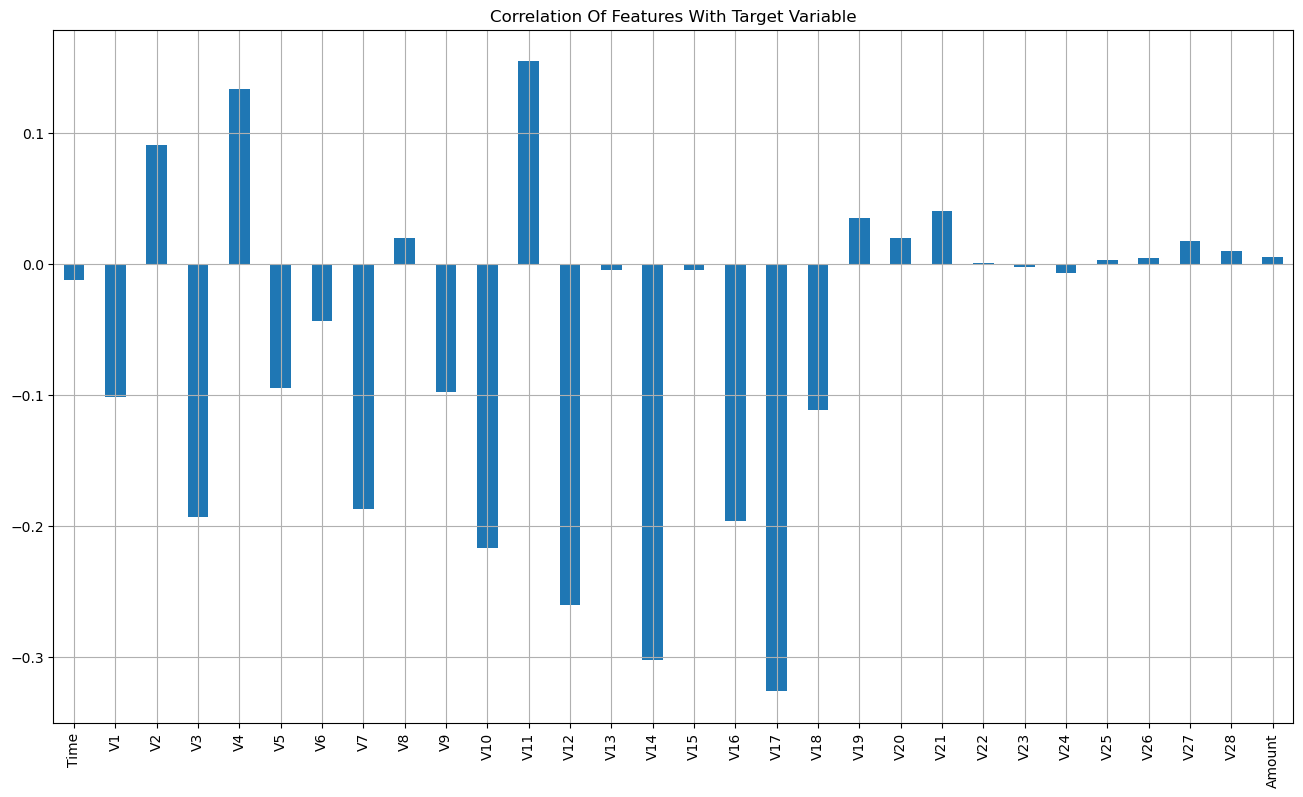

In [ ]:
# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

📌 Some features exhibit a negligible correlation with the target variable and will be removed in the subsequent sections. First, we'll examine the intercorrelation among variables.

<Axes: >

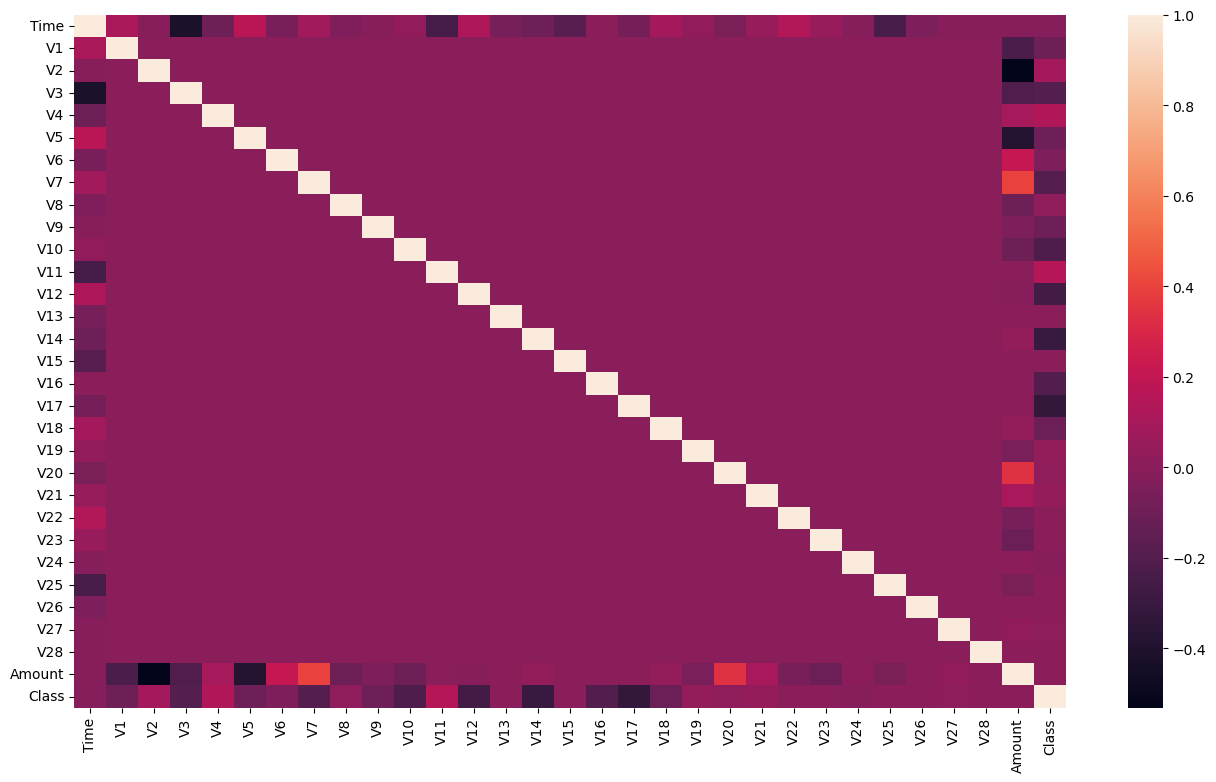

In [ ]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df
sns.heatmap(data.corr())

📌 The only intercorrelated variable among others is the transaction Amount. However, this variable shows no correlation with the target variable, so it will also be removed.

In [ ]:
# Calculate the correlation coefficients between 'Class' and all columns
y = data.corr()['Class']

# Create a copy of the DataFrame df
mydata = data.copy()

# Iterate through columns and drop those with absolute correlation less than 0.13
for i in data.columns:
    if abs(y[i]) < 0.13:
        mydata.drop(columns=[i], inplace=True)

📌Here, we filter our dataset to keep only features with a correlation above 0.13.

In [ ]:
##Check which rows remained in our dataset

mydata.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


V2, V5, V6, V8, V9, V13, V15, etc. were removed


DOWNSAMPLING


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Separate features (X) and target (y)
X = mydata.drop('Class', axis=1)
Y = mydata['Class']

In [ ]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Fit and apply the resampler to the data
x_res, y_res = rus.fit_resample(X, Y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(x_res, columns=X.columns), pd.DataFrame(y_res, columns=['Class'])], axis=1)


downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
266085,-1.707198,0.530768,0.239310,-0.471390,-0.349233,-0.073474,-0.664254,0.157691,0.469860,0
172120,-1.527653,0.121046,0.157221,0.046959,-1.314079,0.508379,0.081326,0.109356,-0.623472,0
15136,0.274699,-0.993262,5.811316,-4.171672,-0.583742,0.346628,-0.899347,-1.784000,1.457844,0
96393,0.823503,-1.451240,1.601392,0.252497,0.922508,-0.114149,-0.282106,1.345463,-0.401365,0
208225,-1.699493,-1.202327,0.437208,-0.455964,0.028435,-0.329083,-1.568433,-0.296621,0.481656,0


Outliers ?

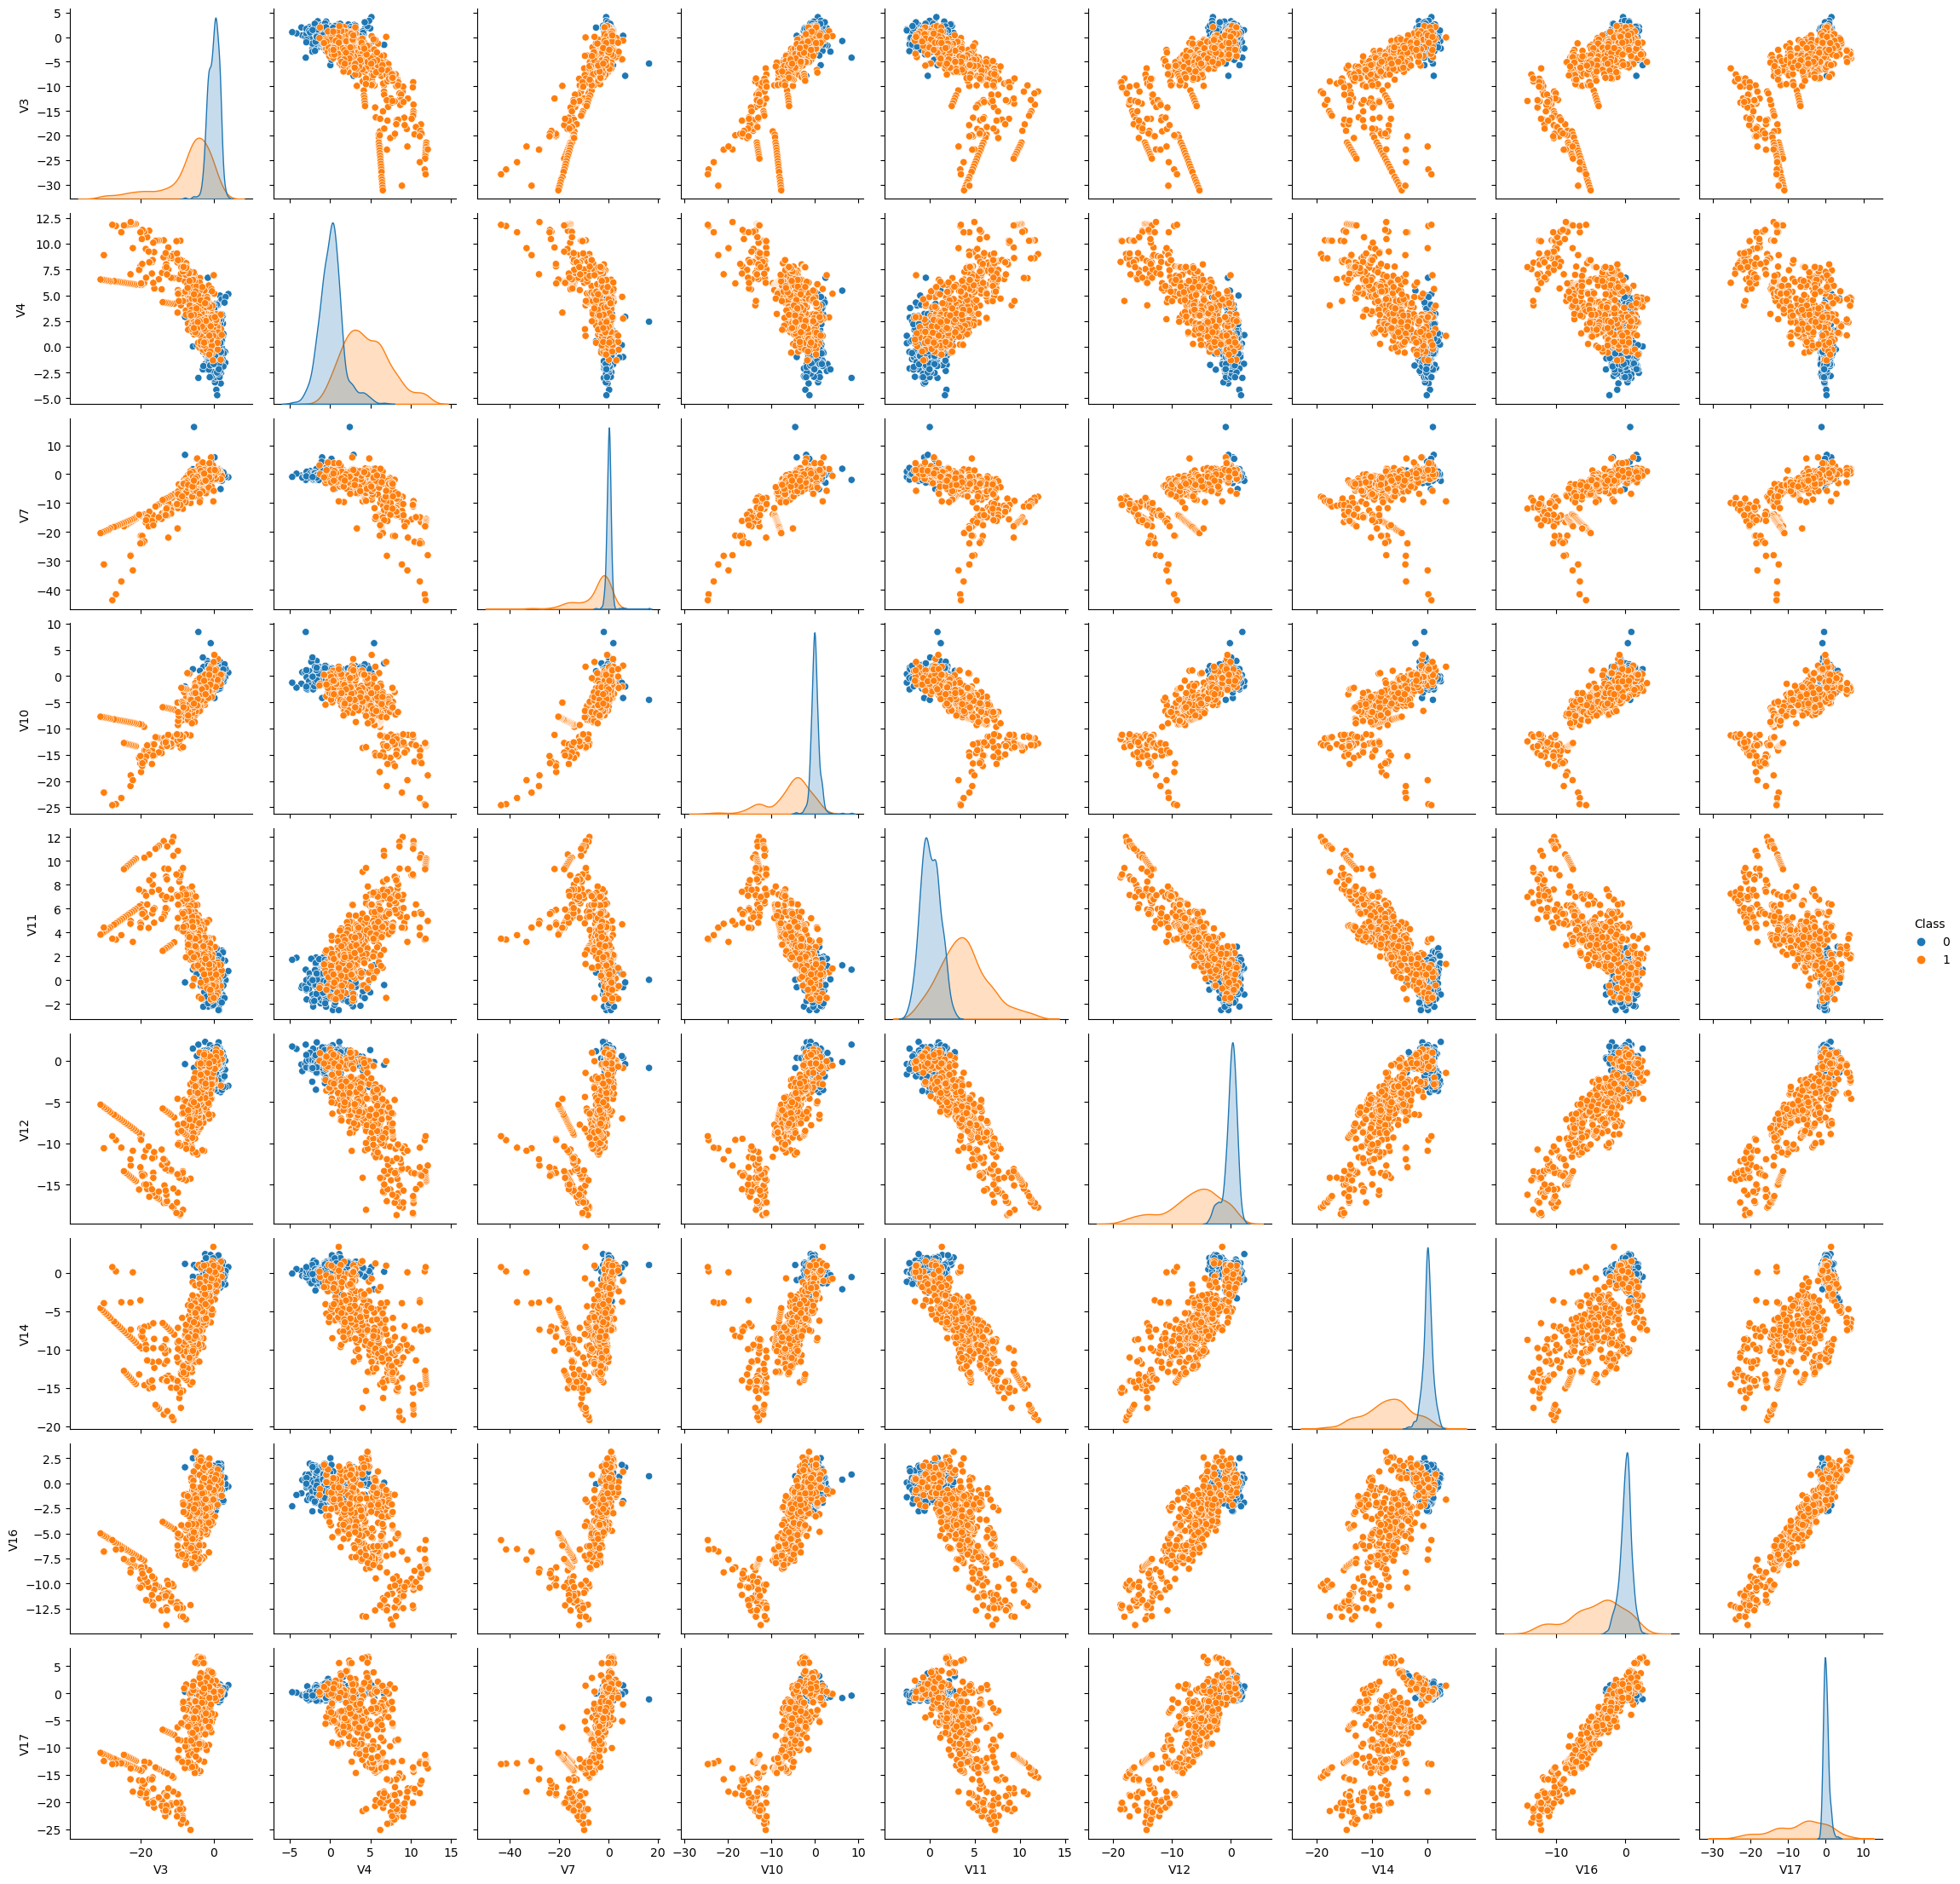

In [ ]:
sns.pairplot(downsampled_df, hue='Class')


Initial Exploration of model performance


In [ ]:
from sklearn.model_selection import train_test_split
from flaml import AutoML

# Separate features and target
X = downsampled_df.drop(columns= 'Class')
y = downsampled_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#settings = {
#    "time_budget": 5,
#    "metric": 'accuracy',
#    "task": 'classification',
#    "seed": 7654321,
#}

# Fit all models
#automl = AutoML()
#automl.fit(X_train, y_train, settings)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "Label Spreading":LabelSpreading(),
    "Label Propagation":LabelPropagation()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9288
- F1 score: 0.9287
- Precision: 0.9721
- Recall: 0.8832
- Roc Auc Score: 0.9289
----------------------------------
Model performance for Test set
- Accuracy: 0.9543
- F1 score: 0.9543
- Precision: 0.9684
- Recall: 0.9388
- Roc Auc Score: 0.9542


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8985
- F1 score: 0.8984
- Precision: 0.8824
- Recall: 0.9184
- Roc Auc Score: 0.8986


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9391
- F1 score: 0.9391
- Precision: 0.9479
- Recall: 0.9286
- Roc Auc Score: 0.9390


Gradient Boost
Model performance for Training se

In [ ]:
model = LabelSpreading()

# Define the parameter grid to search
param_grid = {
    'kernel': ['knn', 'rbf'],  # Kernel function to use
    'gamma': ['scale', 'auto', 0.1, 1.0],  # Kernel coefficient for 'rbf' and 'poly' kernels
    'alpha': [0.1, 0.2, 0.5, 0.8],  # Clamping factor
    'n_neighbors': [3, 5, 7]  # Number of neighbors to consider
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'alpha': 0.8, 'gamma': 0.1, 'kernel': 'knn', 'n_neighbors': 3}
Best Cross-validation Accuracy: 0.93


ENSEMBLE VOTING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

X = downsampled_df.drop(columns='Class')
y = downsampled_df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
label_spreading = LabelSpreading()
label_propagation = LabelPropagation()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create an ensemble
ensemble = VotingClassifier(estimators=[
    ('label_spreading', label_spreading),
    ('label_propagation', label_propagation),
    ('xgb', xgb)
], voting='hard')

# Fit the ensemble to the training data
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate the performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[95  4]
 [ 7 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

